In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pip install ipywidgets
import ipywidgets as widgets
disertacije_lj = pd.read_csv("disertacije_lj.csv", delimiter="|", index_col="ID")
disertacije_mb = pd.read_csv("disertacije_mb.csv", delimiter="|", index_col="ID")

Note: you may need to restart the kernel to use updated packages.


# Analiza doktorskih disertacij

Analizirali bomo doktorske disertacije iz Univerze v Ljubljani in Univerze v Mariboru. Ker se svet neprekinjeno spreminja nas vedno bolj zanima, kateri poklici so najbolj aktualni in kakšni so trendi v dolžini disertacij, jeziku disertacij in najbolj objavljene organizacije. Najbolj zanimiva tema tu mi je jezik. Želim videti, kako se spreminja raba angleščine skozi leta, katere fakultete najbolj uporabljajo angleščino in zakaj.

Najprej si bomo ogledali število disertacij iz Univerze v Ljubljani in Univerze v Mariboru. Kot pričakovano, je bistveno več disertacij iz Univerze v Ljubljani kot iz Univerze v Mariboru. Za analizo večine podatkov bomo gledali samo Univerzo v Ljubljani, potem bomo vključili še Univerzo v Mariboru v primerjavi med njima. Opazimo lahko tudi, da imajo disertacije na DKUM bolj pogosto vse podatke kot disertacije iz RUL. Števili vseh disertacij se približno ujemata z uradnima številoma, odstopanje pa lahko nastane, če program ne more prebrati naslova pravilno ali se kakšen podatek podvoji.

Zgodnje teme analize se bodo ukvarjale z dolžino naslova, ogledov in prenosov. Po tem bomo že začeli gledati jezik - najprej po samih številkah, potem vizualizacije o deležih angleških disertacij po letih za obe univerzi.

Pogledali bomo mentorje. O mentorjih nas zanima, koliko doktorskih disertacij mentorira koliko mentorjev - torej koliko ljudi je mentor eni disertaciji, dvema, več ali celo nobeni. Zadnji dve temi pa bosta o ključnih besedah, specifično najpogostejših ključnih besedah - in o dolžini glavnega dela in njeni povezavi z dolžino naslova.

Na koncu pa so ugotovitve povzete v zaključku.

## Osnovni podatki o količinah in dolžinah


In [2]:
disertacije_lj.count()

Naslov                   3468
Avtor                    3466
Mentor                   3454
Ključne besede           3372
Leto                     3468
Jezik                    3468
Organizacija             3468
Kraj                     1972
Dolžina uvoda            3468
Dolžina glavnega dela    3468
Ogledi                   3468
Prenosi                  3468
dtype: int64

In [3]:
disertacije_mb.count()

Naslov            1254
Avtor             1252
Mentor            1250
Ključne besede    1251
Leto              1254
Jezik             1254
Organizacija      1254
Kraj              1252
Ogledi            1254
Prenosi           1254
dtype: int64

Za ogrevanje poiščimo nekatere zanimive povezave. Recimo, poglejmo, katere disertacije imajo **najkrajše naslove** in potem ugotovimo, če je **povezava med dolžino naslova in številom ogledov.**

In [4]:
disertacije_lj['Dolžina naslova'] = disertacije_lj['Naslov'].str.len()
najkrajši_lj = disertacije_lj.sort_values('Dolžina naslova')
najkrajši_lj.head(10)

,Naslov,Avtor,Mentor,Ključne besede,Leto,Jezik,Organizacija,Kraj,Dolžina uvoda,Dolžina glavnega dela,Ogledi,Prenosi,Dolžina naslova
ID,,,,,,,,,,,,,
150572,Mimesis,"Berlot Pompe, Uršula","Brejc, Tomaž","estetika, podobnost, narava",2009,Slovenski jezik,ALUO - Akademija za likovno umetnost in obliko...,Ljubljana,0,434,1450,164,7
156733,Rast v grafih,"Lukšič, Primož","Robič, Borut","rast v grafih, sferična rast, krogelna rast, z...",2009,Slovenski jezik,FRI - Fakulteta za računalništvo in informatiko,Ljubljana,0,130,709,78,13
17844,Business models,"Marques da Silva, Carlos","Trkman, Peter","informatika, informacijski sistemi, informacij...",2013,Angleški jezik,EF - Ekonomska fakulteta,Ljubljana,5,111,2168,366,15
95864,Fatou components,"Boc Thaler, Luka","Forstnerič, Franc","holomorphic functions, Stein manifolds, long C...",2016,Angleški jezik,FMF - Fakulteta za matematiko in fiziko,Ljubljana,20,107,3196,443,16
131098,Domination games,"Iršič Chenoweth, Vesna","Klavžar, Sandi","domination in graphs, domination game, total d...",2021,Angleški jezik,FMF - Fakulteta za matematiko in fiziko,NaN,0,0,3337,445,16
18113,Urbani menedžment,"Bačlija Brajnik, Irena","Haček, Miro",NaN,2010,Slovenski jezik,FDV - Fakulteta za družbene vede,Ljubljana,0,318,2083,511,17
17920,Proučevanje sreče,"Zevnik, Luka","Stanković, Peter","idejna zgodovina, krščanstvo",2011,Angleški jezik,FDV - Fakulteta za družbene vede,Ljubljana,0,297,2327,542,17
97409,Unimodal category,"Govc, Dejan","Repovš, Dušan","mathematics, unimodal category, monotonicity, ...",2017,Angleški jezik,FMF - Fakulteta za matematiko in fiziko,Ljubljana,0,133,2200,526,17
71919,Človekove pravice,"Tkalec, Staša","Pikalo, Jernej",NaN,2015,Slovenski jezik,FDV - Fakulteta za družbene vede,Ljubljana,0,345,2019,287,17


<Axes: xlabel='Dolžina naslova', ylabel='Ogledi'>

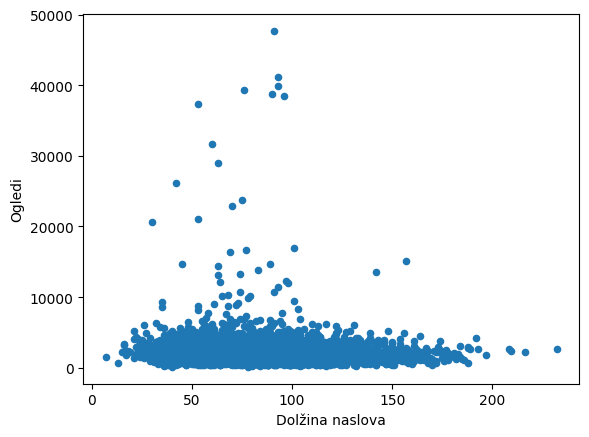

In [5]:
najkrajši_lj.plot.scatter(x='Dolžina naslova', y='Ogledi')

Videti je, kot da **ni specifične povezave med količinama.**. Lahko pa opazimo, da ni nobenih disertacij z zelo dolgimi naslovi (180+ karakterjev), ki bi imele zelo malo ogledov. Zdaj si pa oglejmo nekatere zanimive disertacije (**najdaljše naslove, največ ogledov**). Vidimo, da so vse disertacije z najdaljšimi naslovi (top 20), razen tista disertacija s FDV, s fakultet, ki so povezane z biologijo. To je dokaj predivljivo, saj uporabljajo več dolgih strokovnih terminov.

In [6]:
najkrajši_lj.tail(20)

,Naslov,Avtor,Mentor,Ključne besede,Leto,Jezik,Organizacija,Kraj,Dolžina uvoda,Dolžina glavnega dela,Ogledi,Prenosi,Dolžina naslova
ID,,,,,,,,,,,,,
137680,Uporabnost ustne tekočine prašičev v laborator...,"Plut, Jan","Štukelj, Marina",prašičji reprodukcijski in respiratorni sindro...,2022,Slovenski jezik,VF - Veterinarska fakulteta,NaN,0,0,1547,111,179
115892,Vpliv delovne hitrosti škropljenja pri zatiran...,"Sreš, Alojz","Vučajnk, Filip","škropilnice, kmetijska mehanizacija, delovna h...",2017,Slovenski jezik,BF - Biotehniška fakulteta,Ljubljana,15,122,1633,225,181
76702,Sezonska dinamika dveh vrst sovk iz rodu Mames...,"Devetak, Marko","Trdan, Stanislav","škodljive žuželke, sovke, sezonska dinamika, M...",2014,Slovenski jezik,BF - Biotehniška fakulteta,NaN,6,57,2012,410,181
155954,Vpliv vstavitve zmanjševalca pretoka skozi kor...,"Mrak, Miha","Bunc, Matjaž","angina pektoris, koronarni sinus, omejevalec p...",2024,Slovenski jezik,MF - Medicinska fakulteta,NaN,0,0,1226,107,182
115903,Vsebnost nekaterih primarnih in sekundarnih me...,"Logar, Mateja","Kacjan-Maršić, Nina","navadni fižol, Phaseolus vulgaris, fižolova vd...",2015,Slovenski jezik,BF - Biotehniška fakulteta,Ljubljana,16,109,1866,214,183
115898,Raznolikost in interakcije med virusi zvijanja...,"Štrukelj, Melita","Urek, Gregor","bolezni rastlin, virusne bolezni rastlin, viru...",2016,Slovenski jezik,BF - Biotehniška fakulteta,Ljubljana,13,114,1488,243,184
82302,Učinek osemtedenskega eksperimentalnega progra...,"Masleša, Samo","Štrumbelj, Boro","osebe z motnjami v duševnem razvoju, gibalno u...",2013,Slovenski jezik,FŠ - Fakulteta za šport,Ljubljana,12,140,3030,430,184
142063,High-throughput sequencing detection and molec...,"Miljanić, Vanja","Štajner, Nataša","grapevine, Vitis vinifera, HTS, virome, diagno...",2022,Angleški jezik,BF - Biotehniška fakulteta,NaN,0,0,1264,199,185
142016,Farmakogenetski označevalci odgovora na zdravl...,"Atanasovska Velkovska, Makedonka","Cvenkel, Barbara","Glavkom, oksidativni stres, vnetje, selektivna...",2022,Slovenski jezik,MF - Medicinska fakulteta,NaN,0,0,1146,94,186


In [7]:
najbolj_ogledani_lj = disertacije_lj.sort_values('Ogledi', ascending=False)
najbolj_ogledani_lj.head(10)

,Naslov,Avtor,Mentor,Ključne besede,Leto,Jezik,Organizacija,Kraj,Dolžina uvoda,Dolžina glavnega dela,Ogledi,Prenosi,Dolžina naslova
ID,,,,,,,,,,,,,
84073,Obvladovanje poporodne depresije pri mladih ma...,"Tisovec, Maja","Gostečnik, Christian","simptomi poporodne depresije, relacijska druži...",2016,Slovenski jezik,TEOF - Teološka fakulteta,Ljubljana,10,271,47682,1524,91
108086,Topološka optimizacija paličnih jeklenih struk...,"Tomšič, Pavel","Duhovnik, Jožef",• Jeklene konstrukcije • Paličje • Optimizacij...,2019,Slovenski jezik,FS - Fakulteta za strojništvo,Ljubljana,26,192,41165,354,93
110087,Socialna pravičnost kot vprašanje upravičenost...,"Mišič, Luka","Strban, Grega","socialna pravičnost, socialno zavarovanje, red...",2019,Slovenski jezik,PF - Pravna fakulteta,NaN,0,0,39816,849,93
71969,Mehanizem tvorbe nekovinskih vključkov v jekli...,"Krajnc, Luka","Medved, Jože","jeklo, žveplo, nekovinski vključki, tvorba, ke...",2014,Slovenski jezik,NTF - Naravoslovnotehniška fakulteta,Ljubljana,9,192,39283,1239,76
118716,Molekularna opredelitev kandidatnih izolatov z...,"Kovanda, Anja","Poljak, Mario","virusi, humani virusi papiloma, novi genotipi ...",2012,Slovenski jezik,BF - Biotehniška fakulteta,Ljubljana,14,116,38736,154,90
82805,Skupinska terapevtska pomoč odraslim otrokom a...,"Trtnik, Nada","Gostečnik, Christian","odrasli otroci alkoholikov, relacijska družins...",2016,Slovenski jezik,TEOF - Teološka fakulteta,Ljubljana,10,239,38440,2264,96
132920,Photonic modes in anisotropic topological soft...,"Mur, Urban","Ravnik, Miha","light, nematic liquid crystal, numerical simul...",2021,Angleški jezik,FMF - Fakulteta za matematiko in fiziko,NaN,0,0,37277,465,53
105285,Socialna anksioznost in proces relacijske druž...,"Čampa, Boštjan","Repič Slavič, Tanja","relacijska družinska terapija, socialna anksio...",2018,Slovenski jezik,TEOF - Teološka fakulteta,Ljubljana,11,272,31604,1335,60
122362,"Zaznava krajin, preoblikovanih s postavitvijo ...","Bevk, Tadej","Golobič, Mojca","krajina, obnovljivi viri energije, zaznavanje ...",2020,Slovenski jezik,BF - Biotehniška fakulteta,NaN,0,0,28986,559,63


Zanimivo, a predvidljivo, je, da je 8/10 najbolj ogledanih disertacij napisanih v slovenščini in po izgledu ni direktne povezave med številom ogledov in prenosov.

## Ogledi in prenosi

Oglejmo si še najbolj prenošene disertacije in graf prenosov v odvisnosti od ogledov. Nekatere disertacije imajo celo več prenosov kot ogledov, najbolj prenošena disertacija pa je relativno kratka (glavni del obsega le 72 strani).

In [8]:
najbolj_prenošeni = disertacije_lj.sort_values('Prenosi', ascending=False)
najbolj_prenošeni.head(10)

,Naslov,Avtor,Mentor,Ključne besede,Leto,Jezik,Organizacija,Kraj,Dolžina uvoda,Dolžina glavnega dela,Ogledi,Prenosi,Dolžina naslova
ID,,,,,,,,,,,,,
84223,Vpliv perforacije krovne plošče na višino medv...,"Vodičar, Miha","Vengust, Rok","ortopedija, discektomija, medvretenčna ploščic...",2016,Slovenski jezik,MF - Medicinska fakulteta,Ljubljana,13,72,4259,4794,102
73905,Geografsko vrednotenje bivalnega okolja v izbr...,"Tiran, Jernej","Krevs, Marko","geografija naselij, mesta, Slovenija, doktorsk...",2015,Slovenski jezik,FF - Filozofska fakulteta,Ljubljana,0,323,3906,4244,68
107736,Pravni vidiki biomedicinske pomoči pri spočetju,"Vrtačnik, Urban","Žnidaršič Skubic, Viktorija","OBMP, zunajtelesna oploditev, medicinska neuči...",2019,Slovenski jezik,PF - Pravna fakulteta,NaN,0,0,3724,2649,47
138320,Civilnoprocesni vidik mednarodne ugrabitve otrok,"Čarni Pretnar, Maja","Kramberger Škerl, Jerca","mednarodna ugrabitev otroka, civilnoprocesni v...",2022,Slovenski jezik,PF - Pravna fakulteta,NaN,0,0,2993,2503,48
82805,Skupinska terapevtska pomoč odraslim otrokom a...,"Trtnik, Nada","Gostečnik, Christian","odrasli otroci alkoholikov, relacijska družins...",2016,Slovenski jezik,TEOF - Teološka fakulteta,Ljubljana,10,239,38440,2264,96
97129,Pomen medialnega patelofemoralnega ligamenta (...,"Ambrožič, Bogdan","Antolič, Vane","ortopedija, sklepni ligament, izpah pogačice, ...",2017,Slovenski jezik,MF - Medicinska fakulteta,Ljubljana,7,115,6879,2255,74
30816,KOORDINIRANA REGULACIJA NAPETOSTI V DISTRIBUCI...,"Kolenc, Marko","Blažič, Boštjan","Pametna omrežja, aktivna omrežja, distribucijs...",2015,Slovenski jezik,FE - Fakulteta za elektrotehniko,NaN,0,0,6063,2214,131
87900,Klinični pomen bakterij Ureaplasma parvum in U...,"Marovt, Maruška","Matičič, Mojca","nalezljive bolezni, ureaplazma, moške urogenit...",2016,Slovenski jezik,MF - Medicinska fakulteta,Ljubljana,0,102,13601,2196,142
87724,Travma spolne zlorabe v otroštvu in intimni pa...,"Jerebic, Sara","Repič Slavič, Tanja","spolne zlorabe v otroštvu, travma, partnerski ...",2016,Slovenski jezik,TEOF - Teološka fakulteta,Ljubljana,14,214,5285,2186,60


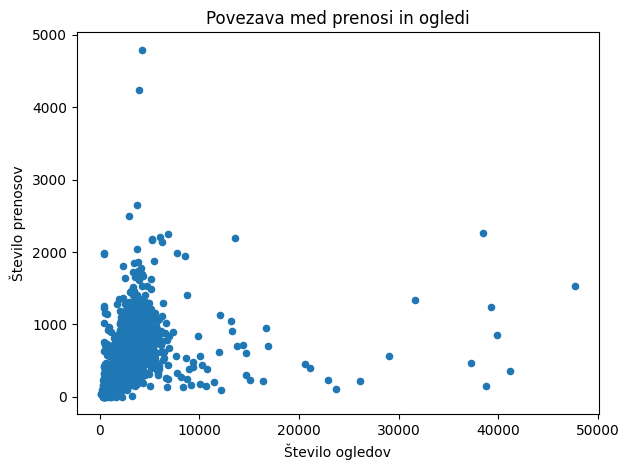

In [9]:
najbolj_prenošeni.plot.scatter(x='Ogledi', y='Prenosi')
plt.title("Povezava med prenosi in ogledi")
plt.xlabel("Število ogledov")
plt.ylabel("Število prenosov")
plt.tight_layout()
plt.show()

## Jezik

Zdaj pa bi se vrnili k izvirnemu vprašanju te naloge - kako se spreminja jezik skozi leta? Poglejmo si najprej, koliko disertacij je v vseh letih napisanih v angleščini in koliko v slovenščini. Ker je zanimiva primerjava, si bomo to ogledali za RUL in DKUM. Po spodnji celici vidimo, da je približno 3:1 razmerje disertacij napisanih v slovenščini proti tistim, napisanih v angleščini za Ljubljano, v Mariboru pa 15:2. Zanima nas tudi, kako se ta delež spreminja skozi leta.

In [10]:
disertacije_mb.groupby("Jezik")["Jezik"].count().sort_values(ascending=False).head(10)

Jezik
Slovenski jezik            1096
Angleški jezik              148
Nemški jezik                  7
Hrvaški jezik                 1
Nemški jezik (Avstrija)       1
Neznan jezik                  1
Name: Jezik, dtype: int64

In [11]:
disertacije_lj.groupby("Jezik")["Jezik"].count().sort_values(ascending=False).head(10)

Jezik
Slovenski jezik     2691
Angleški jezik       772
Nemški jezik           2
Francoski jezik        1
Makedonski jezik       1
Neznan jezik           1
Name: Jezik, dtype: int64

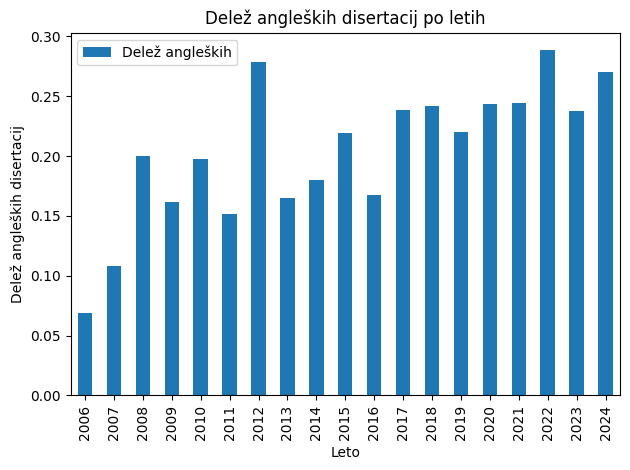

In [12]:
jezik_po_letih_lj = disertacije_lj.groupby(["Jezik", "Leto"]).size()
leta_za_jezik = [2006 + i for i in range(19)]

leta_jezik = {"leta":leta_za_jezik,
    "Delež angleških": [
    jezik_po_letih_lj.get(("Angleški jezik", leto), 0)
    /(jezik_po_letih_lj.get(("Angleški jezik", leto), 0)
    +(jezik_po_letih_lj.get(("Slovenski jezik", leto), 0)))
    for leto in leta_za_jezik
    ]
}

razpredelnica = pd.DataFrame(data=leta_jezik)
razpredelnica.plot.bar(x='leta', y='Delež angleških')
plt.ylabel("Delež angleških disertacij")
plt.xlabel("Leto")
plt.title("Delež angleških disertacij po letih")
plt.tight_layout()

Videti je, da sčasoma delež angleških disertacij res narašča. Leta sem omejil na 2006+, ker je pred tem premalo disertacij za analizo in iz DKUM za nekatera leta ni nobenih, želimo pa primerjati enaka leta. Poglejmo še za Maribor.

Text(0.5, 1.0, 'Delež angleških disertacij po letih')

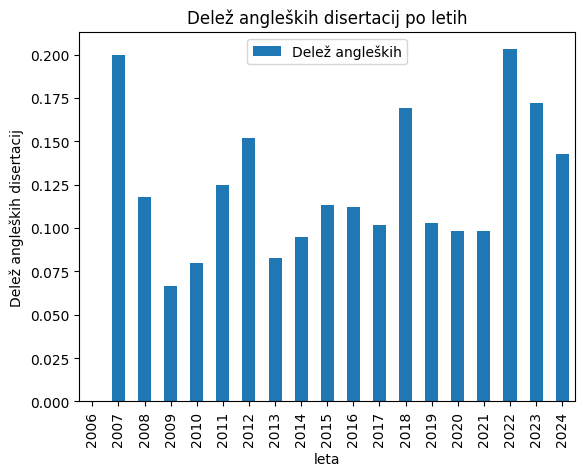

In [13]:
jezik_po_letih_mb = disertacije_mb.groupby(["Jezik", "Leto"]).size()

leta_jezik_maribor = {"leta":leta_za_jezik, "Delež angleških":[
    jezik_po_letih_mb.get(("Angleški jezik", leto), 0)
    /(jezik_po_letih_mb.get(("Slovenski jezik", leto), 0)
    +(jezik_po_letih_mb.get(("Angleški jezik", leto), 1)))
    for leto in leta_za_jezik
    ]

}
razpredelnica = pd.DataFrame(data=leta_jezik_maribor)
razpredelnica.plot.bar(x='leta', y='Delež angleških')
plt.ylabel("Delež angleških disertacij")
plt.title("Delež angleških disertacij po letih")

Delež disertacij iz Univerze v Mariboru, napisanih v angleščini tudi sčasoma narašča. V nekaterih letih so tudi nenadni skoki navzgor. 

Naslednji cilj analize je pogledati, katere organizacije imajo največ objav. Po tem bomo še združili to analizo z jezikom in si ogledali spreminjanje jezikovnih navad za posamezne organizacije skozi leta.

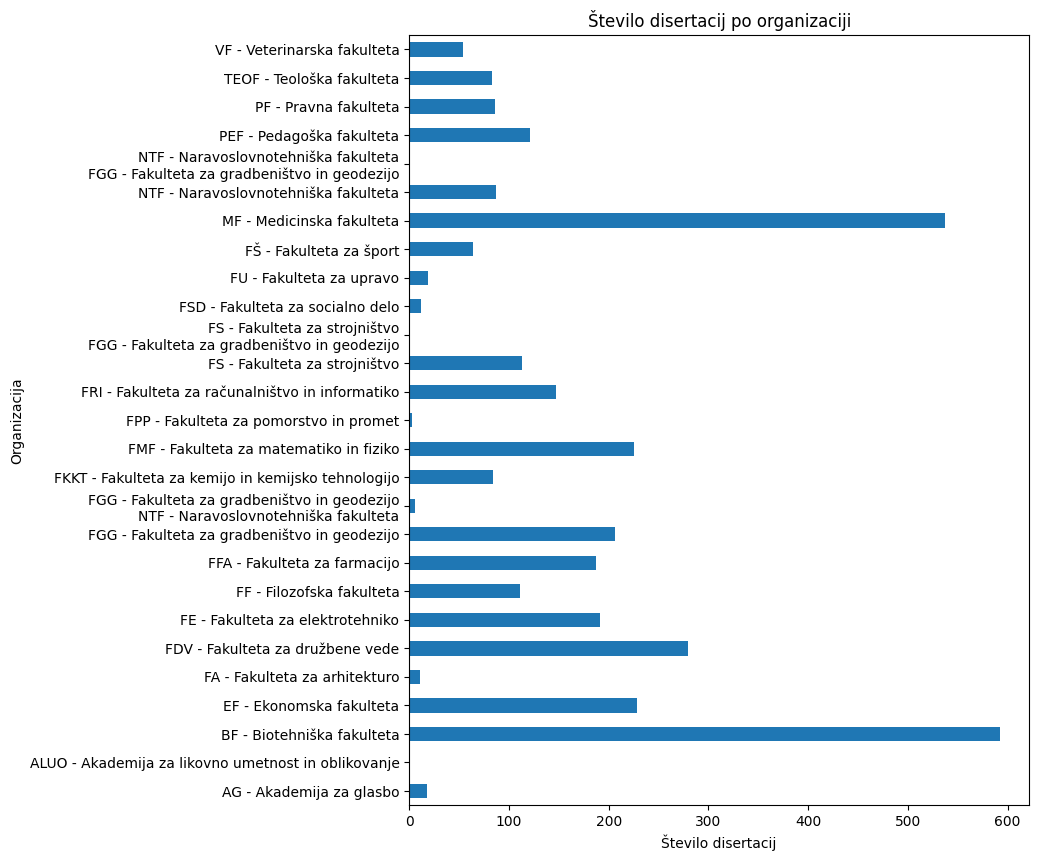

In [14]:
disertacije_organizacije = disertacije_lj.groupby(["Organizacija"]).size()
disertacije_organizacije.plot.barh(figsize=(8, 10), x=disertacije_organizacije.index, y=disertacije_organizacije.values)
plt.title("Število disertacij po organizaciji")
plt.xlabel("Število disertacij")
plt.show()


Naredimo isto za Maribor in primerjajmo najpopularnejše organizacije v Mariboru in v Ljubljani. Po tem ukazu bomo od obeh obdržali le organizacije, ki imajo dovolj (več kot 50) objavljenih disertacij, za zanimivejšo analizo. Zabaven podatek za Ljubljano - poleg nestandardnih vnosov je v zgornji tabeli očitno posebna ALUO (Akademija za likovno umetnost in oblikovanje). Izkaže se, da ima natanko 1 objavljeno disertacijo, ta pa je že prej omenjen "Mimesis", ki ima najkrajše ime in je v resnici precej dolga.

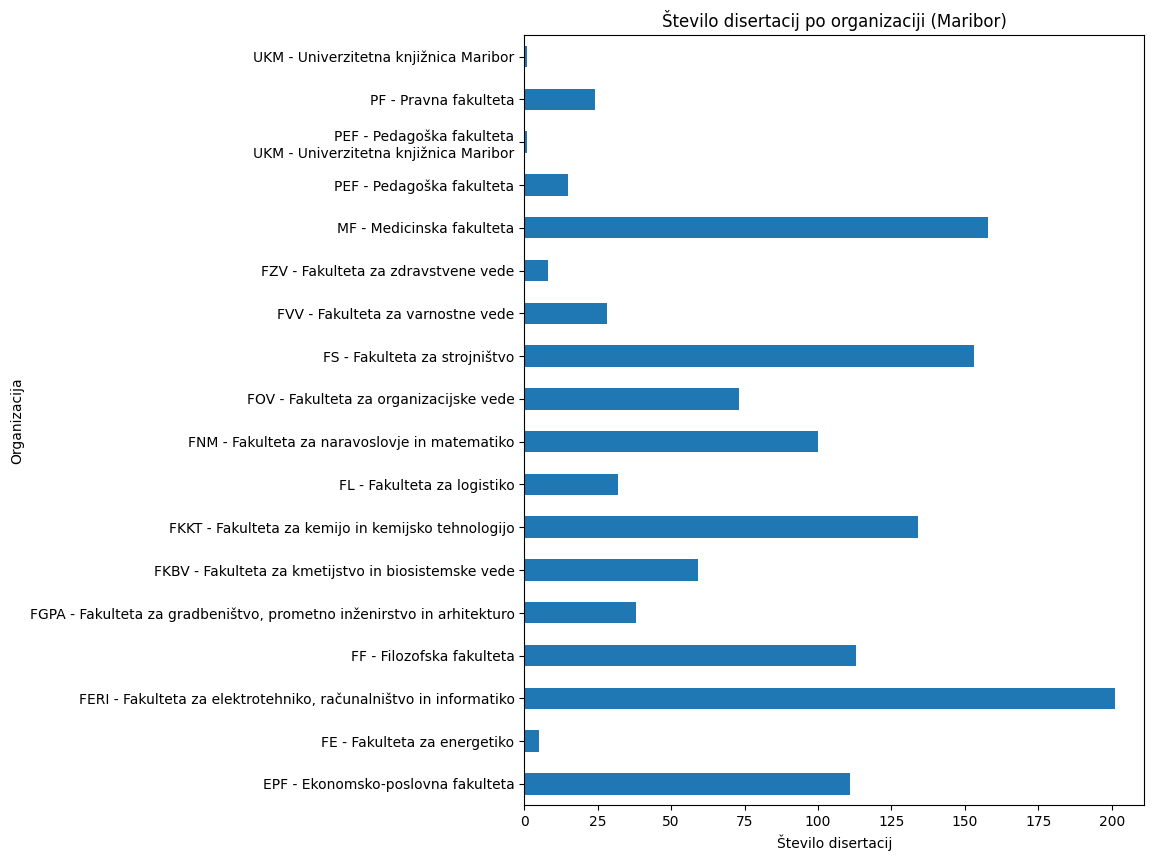

In [15]:
disertacije_organizacije_mb = disertacije_mb.groupby(["Organizacija"]).size()
disertacije_organizacije_mb.plot.barh(figsize=(8, 10))
plt.title("Število disertacij po organizaciji (Maribor)")
plt.xlabel("Število disertacij")
plt.show()

Nekako presenetljivo je FERI najbolj popularna* organizacija v Mariboru, to pa verjetno kaže na popularnost računalniških poklicov v zadnjih letih. Je pa zanimivo, da istega vzorca ni v Ljubljani. Tam pa je veliki fokus na medicinske/biološke zadeve in prej pridejo v upoštev družboslovne fakultete.

**opomba: včasih napišem, da je "najbolj popularno", s tem pa v resnici mislim, da ima največ objavljenih disertacij.*

In [16]:
velike_organizacije_lj = disertacije_organizacije[disertacije_organizacije > 50].index
velike_organizacije_mb = disertacije_organizacije_mb[disertacije_organizacije_mb > 20].index

velike_lj = disertacije_lj[disertacije_lj["Organizacija"].isin(velike_organizacije_lj)]
velike_mb = disertacije_mb[disertacije_mb["Organizacija"].isin(velike_organizacije_mb)]

velike_lj.count()

Naslov                   3396
Avtor                    3394
Mentor                   3382
Ključne besede           3300
Leto                     3396
Jezik                    3396
Organizacija             3396
Kraj                     1912
Dolžina uvoda            3396
Dolžina glavnega dela    3396
Ogledi                   3396
Prenosi                  3396
Dolžina naslova          3396
dtype: int64

In [17]:
velike_mb.count()

Naslov            1224
Avtor             1222
Mentor            1220
Ključne besede    1221
Leto              1224
Jezik             1224
Organizacija      1224
Kraj              1223
Ogledi            1224
Prenosi           1224
dtype: int64

Očitno smo obdržali veliko večino disertacij, kar ni presenetljivo. Poglejmo si zdaj deleže angleških disertacij po organizacijah.

Text(0.5, 1.0, 'Delež angleških disertacij po organizacijah (Ljubljana)')

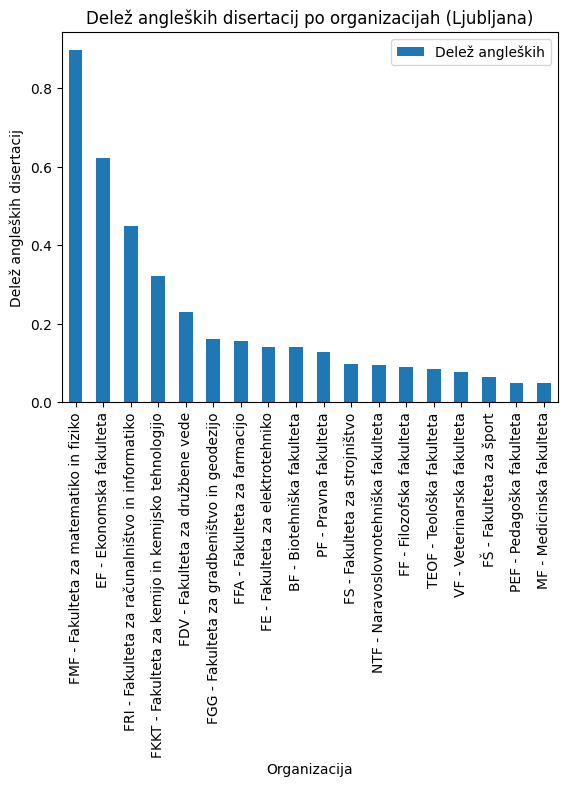

In [18]:
slovenske_angleske_lj = velike_lj[velike_lj['Jezik'].isin(['Slovenski jezik', 'Angleški jezik'])]
jezik_po_organizacijah_lj = slovenske_angleske_lj.groupby(["Jezik", "Organizacija"]).size()
deleži = dict()

for org in velike_organizacije_lj:
    slo_count = len(slovenske_angleske_lj[(slovenske_angleske_lj["Jezik"] == "Slovenski jezik") & 
                                          (slovenske_angleske_lj["Organizacija"] == org)])
    eng_count = len(slovenske_angleske_lj[(slovenske_angleske_lj["Jezik"] == "Angleški jezik") & 
                                          (slovenske_angleske_lj["Organizacija"] == org)])
    total = slo_count + eng_count
    if total > 0:
        delež = eng_count / total
        deleži[org] = delež
    else:
        deleži[org] = 0

deleži_df = (
    pd.Series(deleži, name="Delež angleških")
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"index": "Organizacija"})
    )

jezik_org = deleži_df.plot.bar(x='Organizacija', y='Delež angleških')
plt.xlabel("Organizacija")
plt.ylabel("Delež angleških disertacij")
plt.title("Delež angleških disertacij po organizacijah (Ljubljana)")

Iz prikaza vidimo, da je največji delež angleških disertacij na FMF, medtem ko je najmanjši delež angleških disertacij na MF.

In [19]:
print(deleži["FMF - Fakulteta za matematiko in fiziko"])
print(deleži["MF - Medicinska fakulteta"])

0.8977777777777778
0.048417132216014895


Vidimo, da ima FMF zelo visok delež angleških doktorskih disertacij. Sklepam, da je razlog za to dejstvo to, da je matematično raziskovanje univerzalno - odkritja v Sloveniji so uporabna povsod, zato morajo biti univerzalno dostopno drugim raziskovalcem.

Še malo bomo nadaljevali z analizo jezika, potem pa to povezali z dolžino disertacij in ogledi.

In [20]:
'''Naredili bomo interaktiven graf, ki je podoben prejšnjemu, le odvisen od leta'''
# Ta celica uporabi import iz prve celice
def st_slo_eng(leto, org) -> tuple[int, int]:
    '''Vrne število slovenskih in angleških disertacij za dano leto in organizacijo.'''
    return (len(slovenske_angleske_lj[(slovenske_angleske_lj["Leto"] == leto) &
                                     (slovenske_angleske_lj["Organizacija"] == org) &
                                     (slovenske_angleske_lj["Jezik"] == "Slovenski jezik")]), 
                                     len(slovenske_angleske_lj[(slovenske_angleske_lj["Leto"] == leto) &
                                      (slovenske_angleske_lj["Organizacija"] == org) &
                                      (slovenske_angleske_lj["Jezik"] == "Angleški jezik")]))

deleži_leta = dict()
for leto in [2006 + i for i in range(19)]:
    deleži_leta[leto] = {}
    for org in velike_organizacije_lj:
        slo, eng = st_slo_eng(leto, org)
        total = slo + eng
        if total > 0:
            delež = eng / total
        else:
            delež = 0
        deleži_leta[leto][org] = delež

def tabela_jezik_org(leto: int) -> pd.DataFrame:
     '''Vrne DataFrame z deleži angleških disertacij po organizacijah za dano leto.'''
     df = {"Organizacija": velike_organizacije_lj, 
           "Delež angleških disertacij": [deleži_leta[leto][org] for org in velike_organizacije_lj]}
     return pd.DataFrame(df)

def nariši_graf(leto: int) -> None:
    '''Nariše graf deležev angleških disertacij po organizacijah za dano leto.'''
    tabela = tabela_jezik_org(leto)
    tabela.plot.bar(x='Organizacija', y='Delež angleških disertacij', figsize=(12, 6))
    plt.title(f"Delež angleških disertacij po organizacijah za leto {leto}")
    plt.ylabel("Delež angleških disertacij")
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

widgets.interact(nariši_graf, leto = widgets.IntSlider(min=2006, max=2024, step=1, value=2006))



interactive(children=(IntSlider(value=2006, description='leto', max=2024, min=2006), Output()), _dom_classes=(…

<function __main__.nariši_graf(leto: int) -> None>

## Kraji in mentorji

Ena žalostna opomba je, da je analiza krajev precej nebistvena. Poleg tega, da velika večina disertacij prihaja iz Ljubljane (za UL) ali Maribora (za UM), je zaradi nekonsistentnosti na teh straneh dejansko veliko napačno shranjenih krajev. Zato bomo preskočili analizo krajev, razen s spodnjo celico, ki pokaže distribucijo po krajih.

Za sedaj bomo končali z analizo jezikov in si pogledali osebe. Edina analiza v povezavi z mentorji in komentorji bo sledeča: pogledali bomo, koliko ljudi je mentor 0 disertacijam (torej, da so samo komentorji), 1 disertaciji, 2 disertacijema itd. To bomo hkrati naredili za UL in FMF

In [21]:
kraji_lj = disertacije_lj['Kraj'].value_counts()
kraji_mb = disertacije_mb['Kraj'].value_counts()
print(kraji_lj, kraji_mb)


Kraj
Ljubljana                  1878
[Ljubljana                   60
Nova Gorica                   7
[S. l.                        3
LJubljana                     3
Uppsala                       2
[S. l.]                       2
[S. l.,                       1
[Mannheim                     1
Planina                       1
Sežana                        1
Stockholm                     1
Blacksburg, Virginia          1
Wien                          1
Litija                        1
Frankfurt am Main             1
Samobor                       1
Zaprešić                      1
Trieste                       1
Koper [i. e. Ljubljana]       1
[Celje                        1
[Firenze                      1
Radomlje                      1
London                        1
Name: count, dtype: int64 Kraj
Maribor            808
[Maribor           304
Ljubljana           30
Celje               23
Kranj               21
[Ljubljana          20
[S. l.              20
[Maribor]            7
Krško       

Tukaj je videti, kot da so nekateri kraji napačno pridobljeni, ampak po iskanju na RUL se izkaže, da dejansko piše tako. Ti podatki tudi osiromašijo potencial za zanimivejšo analizo.

In [22]:
osebe_lj = pd.read_csv("disertacije_osebe_Ljubljana.csv", delimiter = "|")
osebe_mb = pd.read_csv("disertacije_osebe_Maribor.csv", delimiter="|")

osebe = dict()
for oseba in osebe_lj["Ime in priimek"]:
    osebe[oseba] = 0
for oseba in osebe_mb["Ime in priimek"]:
    osebe[oseba] = 0

for mentor in disertacije_lj["Mentor"]:
    if str(mentor) in osebe.keys():
        osebe[str(mentor)] += 1
    else:
        osebe[str(mentor)] = 1
for mentor in disertacije_mb["Mentor"]:
    if str(mentor) in osebe.keys():
        osebe[str(mentor)] += 1
    else:
        osebe[str(mentor)] = 1

# Ker so nekatere disertacije napačno shranjene, odstranimo tiste, ki imajo nepravilno shranjene mentorje
osebe.pop("nan", None)

df_osebe = {"Mentor": osebe.keys(), "Število disertacij": osebe.values()}
mentorji = pd.DataFrame(df_osebe)
mentorji.sort_values("Število disertacij", ascending=False, inplace=True)
mentorji.head(20)


,Mentor,Število disertacij
3287,"Knez, Željko",18
3431,"Žalik, Borut",16
4,"Bratko, Ivan",16
1798,"Gostečnik, Christian",12
3264,"Krajnc, Peter",12
1738,"Poljak, Mario",11
1773,"Jerala, Roman",11
132,"Žabkar, Vesna",11
959,"Klavžar, Sandi",11
105,"Raspor, Peter",11


Nekateri mentorji so prave velesile - Željko Knez pa si zasluži posebno omembo. Je redni profesor na FKKT v Mariboru in mu je uspelo biti mentor celim 18 disertacijam.

Poglejmo, kakšna je distribucija količine doktorskih disertacij, za katere je kdo mentor. Vidimo precej hiter padec in da je v resnici večina ljudi takih, ki so bili samo komentorji in nikoli mentorji.

Text(0.5, 1.0, 'Število mentorjev glede na število disertacij')

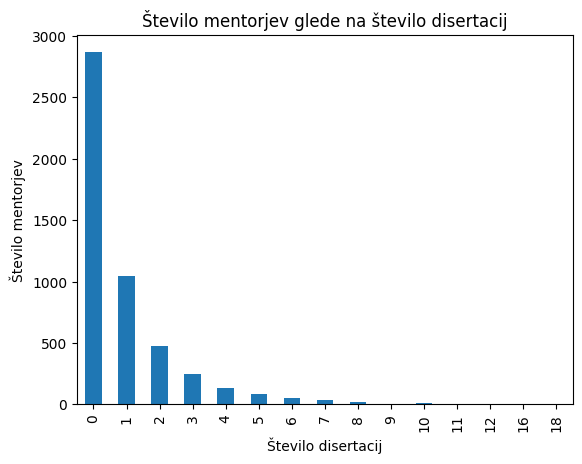

In [23]:
mentorji.groupby("Število disertacij")["Mentor"].count().sort_index().plot.bar()
plt.ylabel("Število mentorjev")
plt.title("Število mentorjev glede na število disertacij")

## Ključne besede in dolžina glavnega dela

Gremo zdaj na nekaj novega. Edini podatki, ki jih še nismo vključili v nobeno analizo, so ime, dolžina uvoda, ključne besede in dolžina glavnega dela. Z imenom ni veliko možne analize. Žal ima velika večina disertacij manjkajočo dolžino uvoda. Torej nam ostanejo še ključne besede in dolžina glavnega dela. 

Najprej bomo obravnavali ključne besede. Naredili bomo podoben interaktiven graf kot prej, ampak bo bolj zanimivo kot samo število ključnih besed. Cilj bo ustvariti interaktiven stolpični diagram, ki pokaže 10 najbolj pogostih ključnih besed do tistega leta. Torej kumulativna poraba ključnih besed do takrat. To bomo storili samo za UL. Najprej pa poglejmo neke zanimive grafe in povprečja za UL in UM.

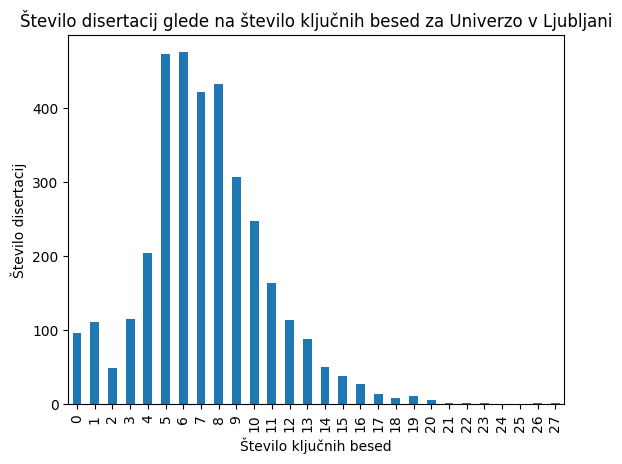

In [24]:
lj_kljucne = disertacije_lj.copy()[["Organizacija", "Ključne besede", "Leto"]]
lj_kljucne["Število ključnih besed"] = lj_kljucne["Ključne besede"].apply(
    lambda x: 0 if pd.isna(x) or str(x).strip() == "" else x.count(",") + 1
)
lj_kljucne.groupby(["Število ključnih besed"])["Število ključnih besed"].count().sort_index().plot.bar()
plt.title("Število disertacij glede na število ključnih besed za Univerzo v Ljubljani")
plt.ylabel("Število disertacij")

mb_kljucne = disertacije_mb.copy()[["Organizacija", "Ključne besede", "Leto"]]
mb_kljucne["Število ključnih besed"] = mb_kljucne["Ključne besede"].apply(
    lambda x: 0 if pd.isna(x) or str(x).strip() == "" else x.count(",") + 1
)


Text(0, 0.5, 'Število disertacij')

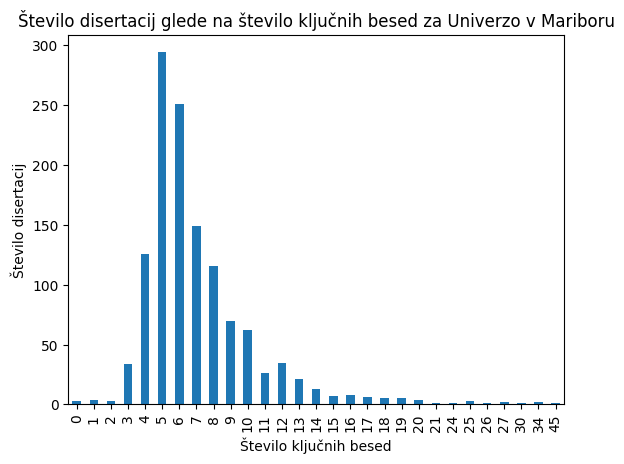

In [25]:
mb_kljucne.groupby(["Število ključnih besed"])["Število ključnih besed"].count().sort_index().plot.bar()
plt.title("Število disertacij glede na število ključnih besed za Univerzo v Mariboru")
plt.ylabel("Število disertacij")

Že ta dva grafa sama od sebe predstavita nekaj zanimivega. Univerza v Mariboru ima manj skrajnih primerov - zelo malo ljudi uporabi 0, 1, 2 ali 3 ključne besede. O povprečju pa je videti, da je mogoče za Univerzo v Ljubljani celo višje. To se izkaže, da je res, ampak v resnici sta števili zelo malo narazen. Naslednji cilj pa je interaktiven graf najpogostejših ključnih besed - tega je tudi enostavno spremeniti v graf najpogostejših besed tistega leta (v 4. vrstici 26. celice spremenimo <= v ==). Ta prvi je zanimiv, ker pokaže dolgotrajne in najbolj popularne interese ter splošne uporabe ključnih besed, slednji pa je zanimiv, ker pokaže po letih najbolj popularne teme in s tem prikazuje, kaj so pričakovali v tistih letih, da je pomembno za prihodnost.

In [26]:
lj_povprečje = lj_kljucne["Število ključnih besed"].mean()
mb_povprečje = mb_kljucne["Število ključnih besed"].mean()

print(lj_povprečje, mb_povprečje)

7.29959630911188 7.110845295055821


In [27]:
def pojavitve_do_leta(leto: int) -> dict[str, int]:
    '''Vzame leto in vrne slovar ključnih besed in njihovih pojavitev do vključno danega leta.'''
    kljucne_besede = dict()
    for seznam_besed in lj_kljucne[(lj_kljucne["Leto"]<=leto)]["Ključne besede"].dropna():
        for beseda in seznam_besed.split(","):
            beseda = beseda.strip().lower()
            if beseda:
                if beseda in kljucne_besede:
                    kljucne_besede[beseda] += 1
                else:
                    kljucne_besede[beseda] = 1
    # for meta_beseda in ["disertacije", "doktorske disertacije", "dissertations"]:
    #     kljucne_besede.pop(meta_beseda, None) 
    return kljucne_besede

def slovar_v_pandas(slovar: dict[str, int]) -> pd.DataFrame:
    '''Vzame slovar ključnih besed in njihovih pojavitev ter vrne DataFrame.'''
    return pd.DataFrame(
        {"Ključna beseda": slovar.keys(),
        "Pojavitve": slovar.values()}
    ).sort_values(by="Pojavitve", ascending=False)


def graf_kljucne(leto: int) -> None:
    '''Nariše graf 10 najpogostejših ključnih besed do vključno danega leta.'''
    kljucne_besede = pojavitve_do_leta(leto)
    df = slovar_v_pandas(kljucne_besede)
    df.head(10).plot.barh(
        x="Ključna beseda",
        y="Pojavitve",
        figsize=(12, 6),
        legend=False
    )
    plt.title(f"10 najpogostejših ključnih besed do vključno leta {leto}")
    plt.xlabel("Število pojavitev")

widgets.interact(graf_kljucne, leto = widgets.IntSlider(min=2006, max=2024, step=1, value=2006))


interactive(children=(IntSlider(value=2006, description='leto', max=2024, min=2006), Output()), _dom_classes=(…

<function __main__.graf_kljucne(leto: int) -> None>

Torej očitno so zelo popularne **meta ključne besede**. V zgornjo celico sem vključil komentar, ki le-te odstrani, če je odkomentiran. 

Zadnji del analize bo primerjal dolžino disertacije z dolžino naslova disertacije. Hipoteza je, da je obratno sorazmerno. Daljši kot je naslov, bolj specifična je tema in je manj za napisati. To smo že videli v skrajnostih proti začetku - disertacija "Mimesis" (najkrajši naslov) ima 434 strani dolgi glavni del, medtem ko ima disertacija z najdaljšim naslovom (o anasteziji) le 70 strani dolg glavni del.

-0.16908174799287456


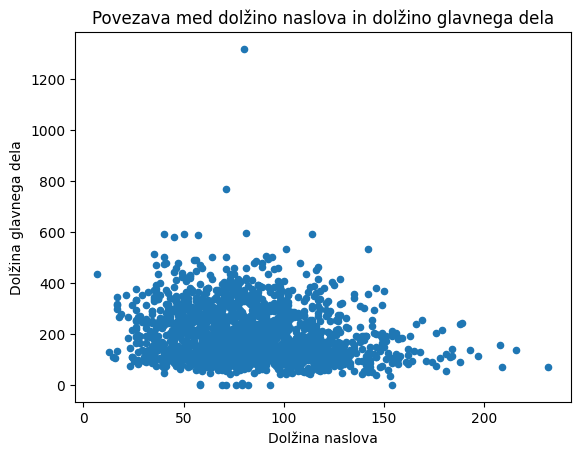

In [28]:
dolzine = disertacije_lj.copy()[["Naslov", "Dolžina naslova", "Dolžina glavnega dela"]][disertacije_lj["Dolžina glavnega dela"] != 0]
dolzine.plot.scatter(x="Dolžina naslova", y="Dolžina glavnega dela")
plt.title("Povezava med dolžino naslova in dolžino glavnega dela")
korelacija = dolzine["Dolžina naslova"].corr(dolzine["Dolžina glavnega dela"])
print(korelacija)

Koeficient relacije je približno -0.17, kar je precej šibko, ampak je usklajeno s hipotezo. V posebnem primeru vidimo, da so vse disertacije, katere naslov je daljši od 150 znakov, precej krajše od ostalih. Samo iz zanimanja si še na kratko poglejmo, kateri disertaciji sta dolgi 800 strani in več kot 1200 strani, potem pa gremo na zaključne misli.

In [29]:
disertacije_lj.sort_values(by="Dolžina glavnega dela", ascending=False).head(10)

,Naslov,Avtor,Mentor,Ključne besede,Leto,Jezik,Organizacija,Kraj,Dolžina uvoda,Dolžina glavnega dela,Ogledi,Prenosi,Dolžina naslova
ID,,,,,,,,,,,,,
159540,Effect of tribological properties on tooth roo...,"Matkovič, Sebastjan","Kalin, Mitjan","polymer, tribology, friction, gear, tooth root...",2024,Angleški jezik,FS - Fakulteta za strojništvo,Ljubljana,20,1318,613,157,80
82695,Poezija Franceta Prešerna v srednješolskih učb...,"Božič, Zoran","Krakar-Vogel, Boža","poezija, Prešeren, didaktika, recepcija, kanon...",2010,Slovenski jezik,FF - Filozofska fakulteta,NaN,0,768,3883,1220,71
70305,Družbenopolitično vzpostavljanje rasizma (s po...,"Vrečko Ilc, Blaž","Pikalo, Jernej",NaN,2015,Slovenski jezik,FDV - Fakulteta za družbene vede,Ljubljana,0,596,2323,276,81
86875,Raznolikost volilnih kampanj v Sloveniji,"Maksuti, Alem","Deželan, Tomaž","predvolilna kampanja, politične komunikacije, ...",2016,Slovenski jezik,FDV - Fakulteta za družbene vede,Ljubljana,0,594,2555,387,40
141519,Informativnost arheološkega površinskega zapis...,"Gruškovnjak, Luka","Mlekuž Vrhovnik, Dimitrij","arheologija, arheološka metodologija, metoda p...",2022,Slovenski jezik,FF - Filozofska fakulteta,Ljubljana,42,594,1915,173,114
150555,"Razvoj, trajnost in demokracija, nemogoča troj...","Kančev, Ivan","Vodovnik, Žiga","cilji trajnostnega razvoja, nizozemska bolezen...",2023,Angleški jezik,FDV - Fakulteta za družbene vede,Ljubljana,0,592,1360,131,50
121507,Jezik in družbena (ne)enakost spolov na trgu d...,"Mikić, Jasna","Kanjuo-Mrčela, Aleksandra","spol, jezik, slovenščina, seksizem, seksističn...",2020,Slovenski jezik,FDV - Fakulteta za družbene vede,Ljubljana,0,589,2269,408,57
18122,Antropološka analiza subkulture cestnih otrok,"Naterer, Andrej","Godina, Vesna V.",NaN,2010,Slovenski jezik,FDV - Fakulteta za družbene vede,Ljubljana,0,582,1507,206,45
105852,Odnos pripadnikov večinskega naroda v Slovenij...,"Jagodic, Marija Viktorija","Miheljak, Vlado",NaN,2018,Slovenski jezik,FDV - Fakulteta za družbene vede,Ljubljana,0,535,9399,416,101


Po zgornji tabeli je najdaljša disertacija "Effect of tribological properties on tooth root fatigue failure of polymer gears", ampak to ni res. Dejanski dokument je dolg le 192 strani. Na repozitoriju Univerze v Ljubljani pa je dejansko napisano, da je dolga 1318 strani. Druga najdaljša disertacija, ki ima naslov "Poezija Franceta Prešerna v srednješolskih učbenikih in njena recepcija : doktorska disertacija", pa je dejansko dolga 768 strani. Družboslovne fakultete dominirajo seznam najdaljših disertacij. Možen razlog za to je, da obsegajo obsežna dela in ideje, medtem ko ima matematika običajno bolj ozke teme za disertacije in natančejše cilje.

# Zaključek

## Splošne ugotovitve o razlikah med Univerzo v Ljubljani in Univerzo v Mariboru

Med objavljenimi disertacijami so bile nekatere razlike, ki so bile bolj presenetljive kot druge. Najbolj presenetljiva razlika je bila, da je delež angleških disertacij v Ljubljani veliko večji kot taisti podatek v Mariboru - približno 3:1 razmerje slovenskih disertacij proti angleškim za Ljubljano in 15:2 za Maribor.

Seveda je število disertacij bilo veliko večje na RUL kot na DKUM, kar je pričakovano, malo nepričakovano pa je, da sta obe strani bili tako nestabilni in nekonsistentni. Zelo težko je bilo zajeti podatke, ker se strani med disertacijami zelo razlikujejo, veliko disertacijam manjkajo podatki in nekatere disertacije imajo celo napačne podatke.

Najbolj poglavitne ugotovitve te naloge so, seveda, v povezavi z jezikom. Pokazali smo, da je FMF usmerjena k angleščini, medtem ko je MF strogo slovenska fakulteta. Te ugotovitve, med drugimi, imajo resničen pomen za današnji svet in prihodnost - razumeti je treba razloge za to in kako bo to vplivalo na kakovost teh univerz.